# House price end to end project 

# Look at the Big Picture 

Frame the Problem 

Select a Performance Measure 

Check the Assumptions

# Get the Data 

Create the Workspace

Download the Data 

Take a Quick Look at the Data Structure

Create a Test Set 

# Discover and Visualize the Data to Gain Insights 

Visualizing Geographical Data 

Looking for Correlations 

Experimenting with Attribute Combinations

# Prepare the Data for Machine Learning Algorithms 

Data Cleaning

Handling Text and Categorical Attributes

Custom Transformers 

Feature Scaling

Transformation Pipelines 

# Select and Train a Model 

Training and Evaluating on the Training Set

Better Evaluation Using Cross-Validation 

# Fine-Tune The Model 

Grid Search 

Randomized Search 

Ensemble Methods

Analyze the Best Models and Their Errors 

Evaluate Your System on the Test Set


 

import the important libraries

In [34]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [12]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Get our data
our data was splitted to train set and test set so we are ready to discover it

In [13]:
# read the data
train_data = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')

In [14]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [16]:
train_data.shape

(1460, 81)

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Numerical data

In [22]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [38]:
index_num = list(train_data.describe().T.index)
train_data_num = train_data[index_num]

In [39]:
train_data_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


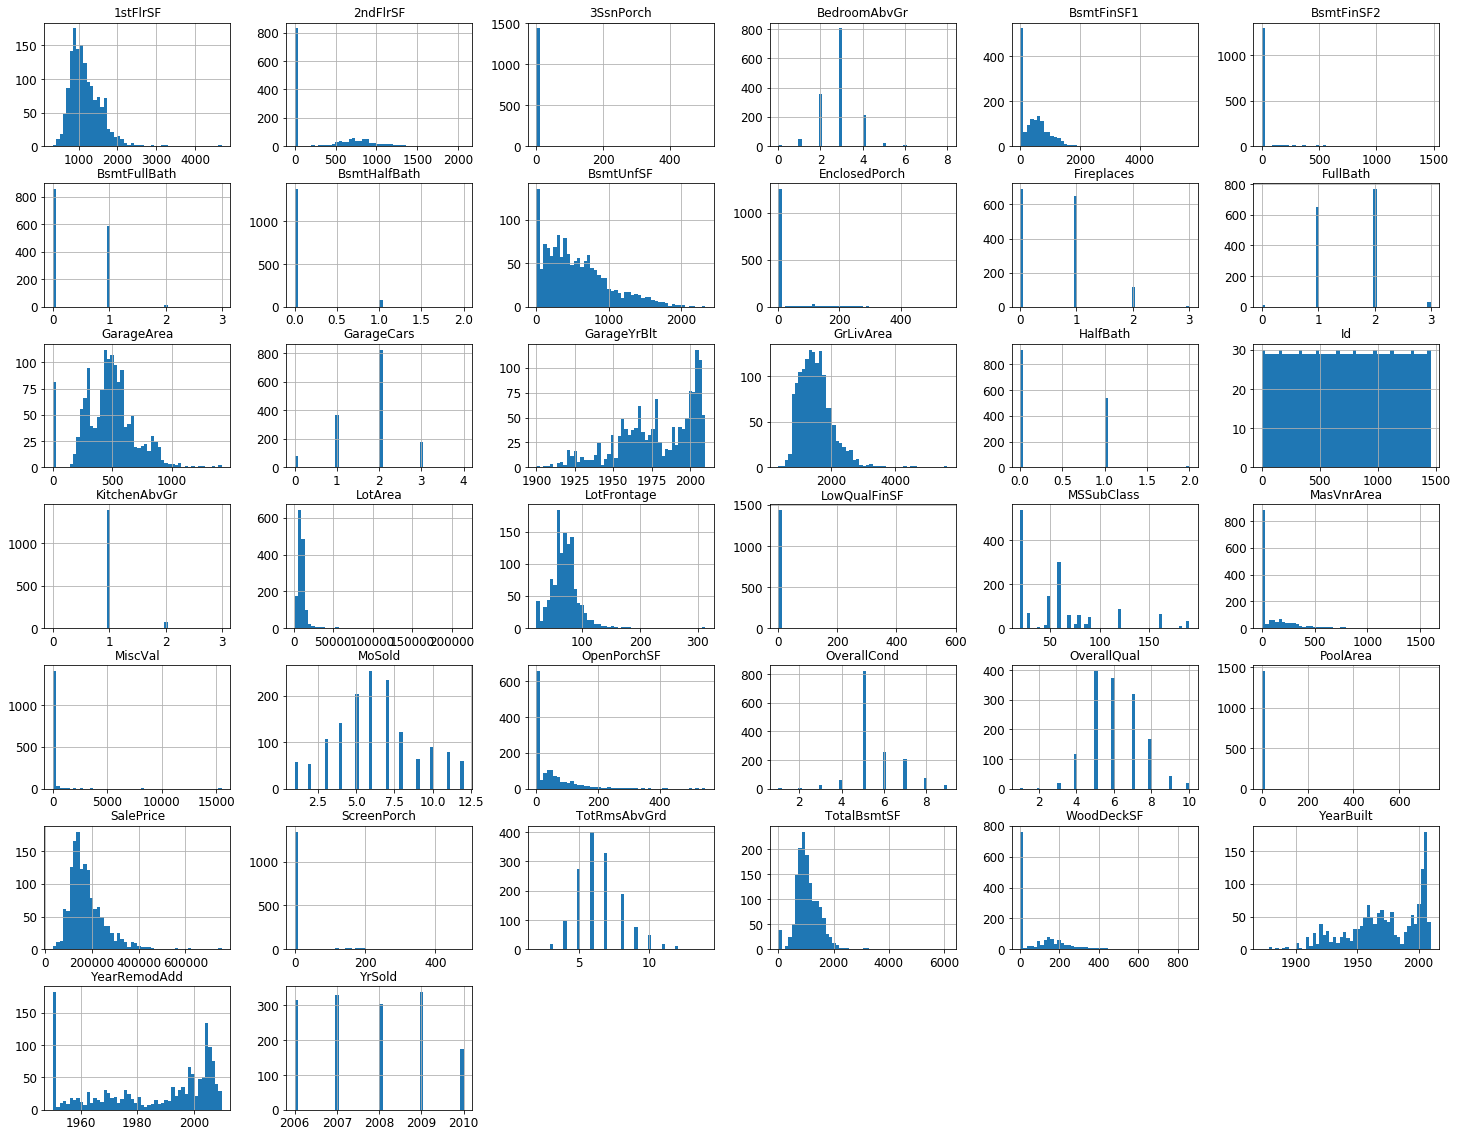

In [36]:
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(25,20))
plt.show()

looking at the corrolation 

In [48]:
corr_matrix = train_data_num.corr()

In [49]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

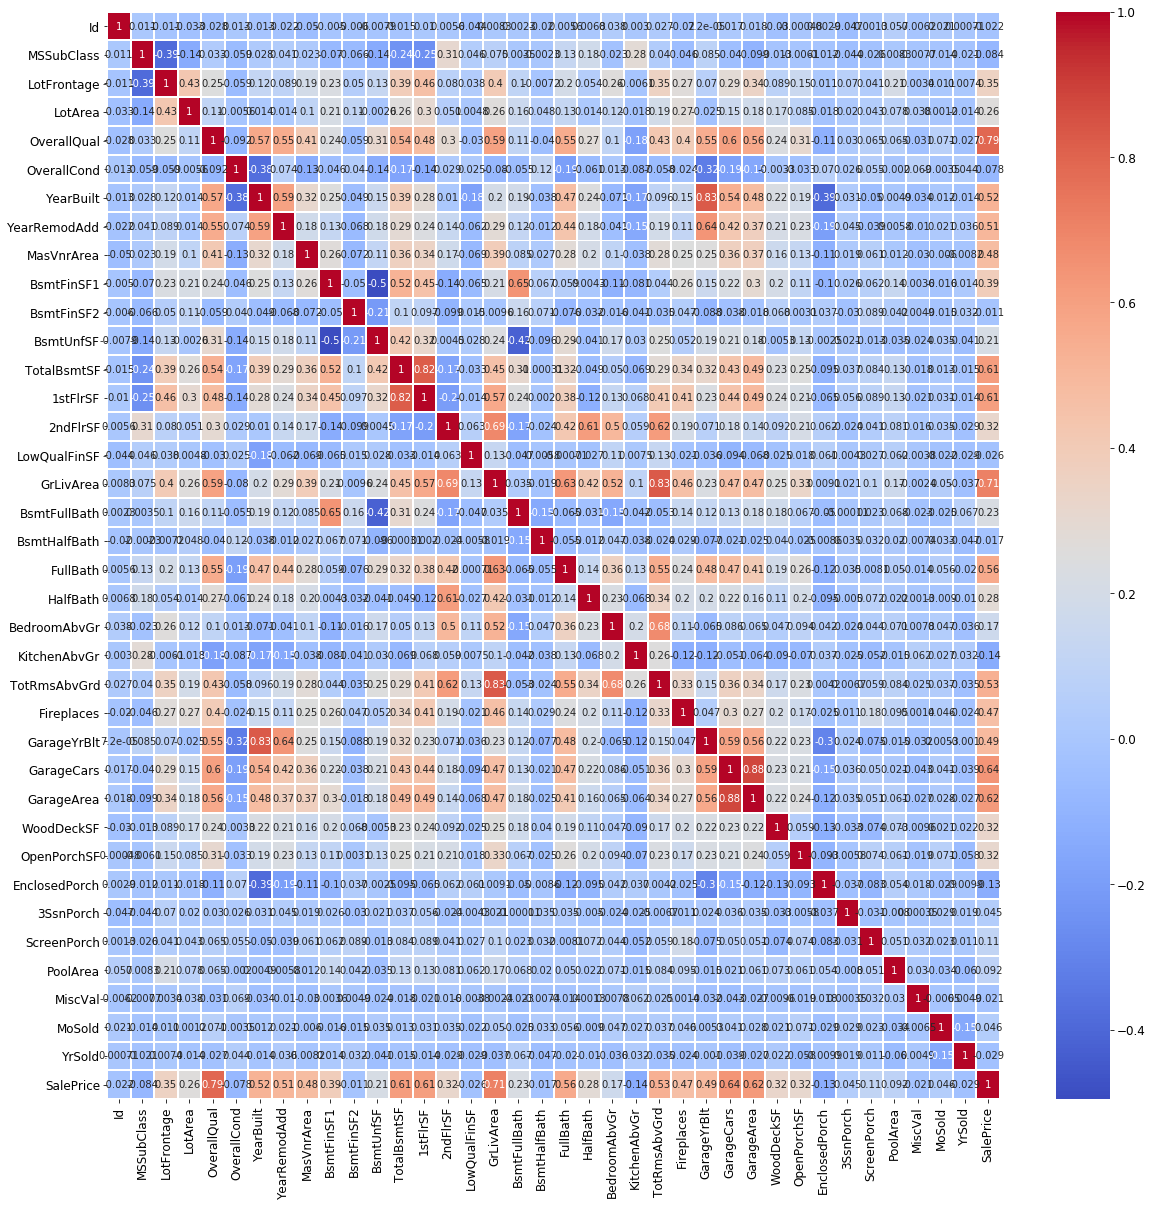

In [53]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True,linewidths=1)

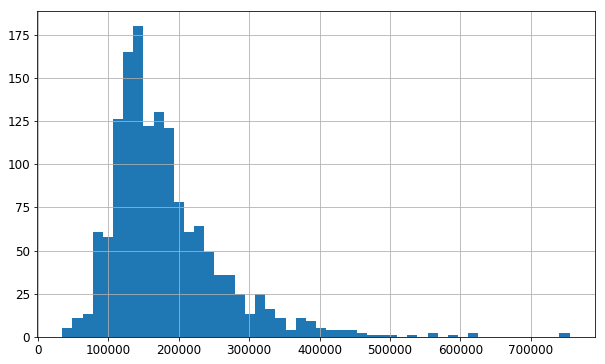

In [67]:
plt.figure(figsize=(10,6))
train_data_num['SalePrice'].hist(bins=50)

most important feture 

# clean and standerize the numerical data

In [155]:
#MSSubClass=The building class
train_data['MSSubClass'] = train_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
train_data['OverallCond'] = train_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
train_data['YrSold'] = train_data['YrSold'].astype(str)
train_data['MoSold'] = train_data['MoSold'].astype(str)



In [157]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null object
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [159]:
index_num = list(train_data.describe().T.index)
train_data_num = train_data[index_num]

In [161]:
housing = train_data_num.drop(["SalePrice",'Id'], axis=1) # drop labels for training set
housing_labels = train_data_num["SalePrice"].copy()

In [162]:
housing.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,7,2003,2003,196.0,706,0,150,856,...,2003.0,2,548,0,61,0,0,0,0,0
1,80.0,9600,6,1976,1976,0.0,978,0,284,1262,...,1976.0,2,460,298,0,0,0,0,0,0
2,68.0,11250,7,2001,2002,162.0,486,0,434,920,...,2001.0,2,608,0,42,0,0,0,0,0
3,60.0,9550,7,1915,1970,0.0,216,0,540,756,...,1998.0,3,642,0,35,272,0,0,0,0
4,84.0,14260,8,2000,2000,350.0,655,0,490,1145,...,2000.0,3,836,192,84,0,0,0,0,0


**Transforming some numerical variables that are really categorical**

In [163]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [164]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
                        ])

housing_num_tr = num_pipeline.fit_transform(housing)

In [165]:
housing_num_tr = pd.DataFrame(housing_num_tr,columns= housing.columns,
                              index=housing.index)

In [166]:
housing_num_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
LotFrontage      1460 non-null float64
LotArea          1460 non-null float64
OverallQual      1460 non-null float64
YearBuilt        1460 non-null float64
YearRemodAdd     1460 non-null float64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null float64
BsmtFinSF2       1460 non-null float64
BsmtUnfSF        1460 non-null float64
TotalBsmtSF      1460 non-null float64
1stFlrSF         1460 non-null float64
2ndFlrSF         1460 non-null float64
LowQualFinSF     1460 non-null float64
GrLivArea        1460 non-null float64
BsmtFullBath     1460 non-null float64
BsmtHalfBath     1460 non-null float64
FullBath         1460 non-null float64
HalfBath         1460 non-null float64
BedroomAbvGr     1460 non-null float64
KitchenAbvGr     1460 non-null float64
TotRmsAbvGrd     1460 non-null float64
Fireplaces       1460 non-null float64
GarageYrBlt      1460 non-null floa

showing the most important feture fro numerical data

C:\Users\Seif Mohamed\Anaconda3(1)\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.05448413 0.05853383 0.03630599 0.05281749 0.05176568 0.03488434
 0.04734889 0.01620882 0.05799867 0.05491755 0.05183427 0.03195027
 0.00288658 0.05401746 0.01825731 0.0068128  0.01138829 0.01583714
 0.02973538 0.00410509 0.0388     0.02028103 0.05527908 0.02262851
 0.05134397 0.03908419 0.04134991 0.01707371 0.00329763 0.01244254
 0.00072054 0.00560892]


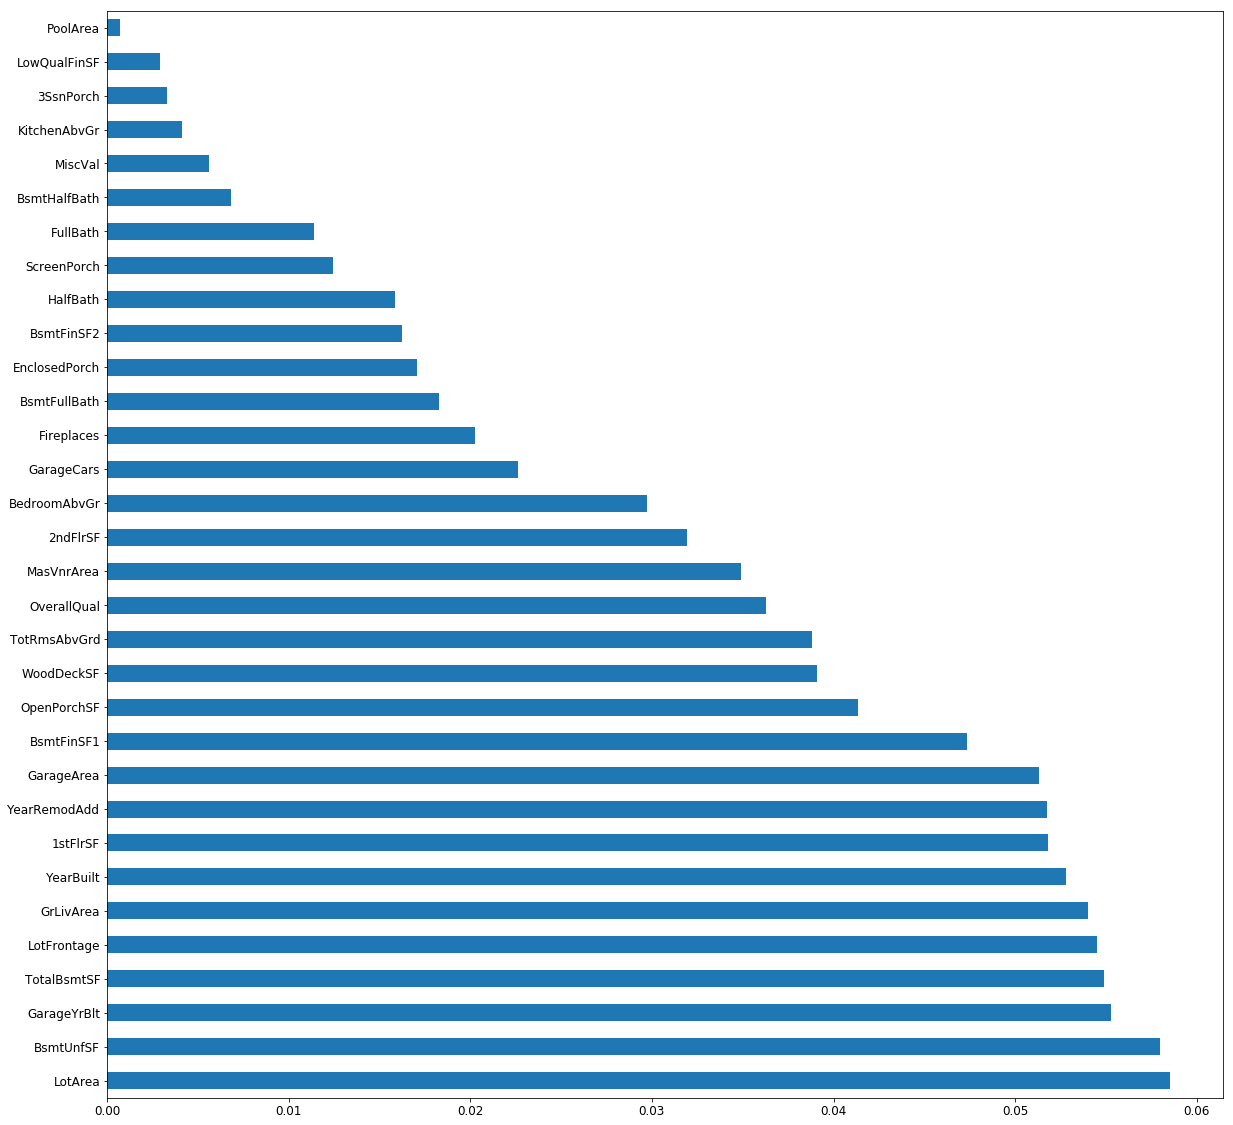

In [167]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = housing_num_tr #independent columns
y = housing_labels  #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(20,20))
feat_importances.nlargest(36).plot(kind='barh')
plt.show()

In [124]:
most_30_feat= (feat_importances.nlargest(30)).index

In [125]:
most_30_feat

Index(['GarageArea', 'GrLivArea', 'BsmtUnfSF', 'LotArea', 'YearRemodAdd',
       'LotFrontage', 'MoSold', 'TotalBsmtSF', 'GarageYrBlt', '1stFlrSF',
       'YearBuilt', 'YrSold', 'BsmtFinSF1', 'OpenPorchSF', 'TotRmsAbvGrd',
       'WoodDeckSF', 'OverallQual', 'MasVnrArea', 'OverallCond',
       'BedroomAbvGr', 'Fireplaces', 'MSSubClass', '2ndFlrSF', 'BsmtFullBath',
       'GarageCars', 'BsmtFinSF2', 'HalfBath', 'EnclosedPorch', 'FullBath',
       'ScreenPorch'],
      dtype='object')

### categorical data 

In [211]:
train_data_cat = train_data.drop(index_num,axis=1)

In [212]:
train_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallCond      1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423

In [213]:
train_data_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


In [214]:
train_data_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


In [215]:
train_data_cat.mode()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,Gd,MnPrv,Shed,6,2009,WD,Normal


In [216]:
train_data.shape

(1460, 81)

### clean the categorical data

drop the coulmns that have more than 20% missing values

In [217]:
train_data_cat.isna().sum()

MSSubClass          0
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallCond         0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
MoSold              0
YrSold              0
SaleType  

In [218]:
count_20 = (1460/100)*20

In [219]:
count_20

292.0

In [220]:
x = (train_data_cat.isna().sum()) > count_20

In [221]:
a = x[x!=True]
a

MSSubClass       False
MSZoning         False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallCond      False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functional       False
GarageType       False
GarageFinish     False
GarageQual       False
GarageCond       False
PavedDrive       False
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
dtype: bool

In [222]:
index_20 = list(a.index)

In [223]:
train_cat_20 = train_data_cat[index_20]

In [224]:
train_cat_20.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,Attchd,RFn,TA,TA,Y,2,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Typ,Attchd,RFn,TA,TA,Y,5,2007,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,Attchd,RFn,TA,TA,Y,9,2008,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Typ,Detchd,Unf,TA,TA,Y,2,2006,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Typ,Attchd,RFn,TA,TA,Y,12,2008,WD,Normal


In [290]:
def clean_20 (data):
    count__20 = (len(data)/100)*20
    x = (data.isna().sum()) > count__20
    a = x[x!=True]
    index_20 = list(a.index)
    clean_data = data[index_20]
    return clean_data

**Label Encoding some categorical variables that may contain information in their ordering set** 

In [226]:
from sklearn.preprocessing import LabelEncoder
cols = ( 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional',  'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train_cat_20[c].values)) 
    train_cat_20[c] = lbl.transform(list(train_cat_20[c].values))

# shape        
print('Shape train_cat_20: {}'.format(train_cat_20.shape))




C:\Users\Seif Mohamed\Anaconda3(1)\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Shape train_cat_20: (1460, 42)


**Getting dummy other categorical features**

In [227]:
train_cat_20 = pd.get_dummies(train_cat_20)
print(train_cat_20.shape)

(1460, 180)


In [229]:
train_cat_20.head()

,MSSubClass,Street,LotShape,LandSlope,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9,1,3,0,4,2,4,2,3,3,...,0,0,0,1,0,0,0,0,1,0
1,4,1,3,0,7,3,4,2,3,1,...,0,0,0,1,0,0,0,0,1,0
2,9,1,0,0,4,2,4,2,3,2,...,0,0,0,1,0,0,0,0,1,0
3,10,1,0,0,4,3,4,3,1,3,...,0,0,0,1,1,0,0,0,0,0
4,9,1,0,0,4,2,4,2,3,0,...,0,0,0,1,0,0,0,0,1,0


In [283]:
housing_num_tr.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-0.220875,-0.207142,0.651479,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,...,1.017598,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
1,0.460320,-0.091886,-0.071836,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,...,-0.107927,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
2,-0.084636,0.073480,0.651479,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,...,0.934226,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
3,-0.447940,-0.096897,0.651479,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,...,0.809167,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688
4,0.641972,0.375148,1.374795,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,...,0.892540,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688


In [284]:
train_data_model = housing_num_tr.join(train_cat_20)

In [286]:
train_data_model.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.220875,-0.207142,0.651479,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,...,0,0,0,1,0,0,0,0,1,0
1,0.460320,-0.091886,-0.071836,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,...,0,0,0,1,0,0,0,0,1,0
2,-0.084636,0.073480,0.651479,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,...,0,0,0,1,0,0,0,0,1,0
3,-0.447940,-0.096897,0.651479,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,...,0,0,0,1,1,0,0,0,0,0
4,0.641972,0.375148,1.374795,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,...,0,0,0,1,0,0,0,0,1,0


**prepare the testset** 

In [297]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [299]:
test_data_clean_20 = clean_20(test_data)

In [301]:
#MSSubClass=The building class
test_data_clean_20['MSSubClass'] = test_data_clean_20['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
test_data_clean_20['OverallCond'] = test_data_clean_20['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
test_data_clean_20['YrSold'] = test_data_clean_20['YrSold'].astype(str)
test_data_clean_20['MoSold'] = test_data_clean_20['MoSold'].astype(str)



C:\Users\Seif Mohamed\Anaconda3(1)\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Seif Mohamed\Anaconda3(1)\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Seif Mohamed\Anaconda3(1)\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

In [302]:
index_num = list(test_data_clean_20.describe().T.index)
test_data_num = test_data_clean_20[index_num]

In [308]:

test_data_num.drop('Id',axis=1,inplace=True)

C:\Users\Seif Mohamed\Anaconda3(1)\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [305]:
test_data_cat = test_data_clean_20.drop(index_num,axis=1)


In [314]:
test_data_cat.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Typ,Attchd,Unf,TA,TA,Y,6,2010,WD,Normal
1,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Typ,Attchd,Unf,TA,TA,Y,6,2010,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Typ,Attchd,Fin,TA,TA,Y,3,2010,WD,Normal
3,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Typ,Attchd,Fin,TA,TA,Y,6,2010,WD,Normal
4,120,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Typ,Attchd,RFn,TA,TA,Y,1,2010,WD,Normal


In [309]:
test_data_tr = num_pipeline.transform(test_data_num)

In [312]:
test_data_num_tr = pd.DataFrame(test_data_tr,columns=test_data_num.columns,
                                            index = test_data_num.index )

In [313]:
test_data_num_tr.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,0.460320,0.110763,-0.795151,-0.340077,-1.156380,-0.570750,0.053428,0.604293,-0.672923,-0.400017,...,-0.733219,-1.026858,1.202536,0.365179,-0.704483,-0.359325,-0.116339,1.882709,-0.068692,-0.087688
1,0.505733,0.375850,-0.071836,-0.439440,-1.301740,0.027027,1.051363,-0.288653,-0.365032,0.619239,...,-0.858277,-1.026858,-0.753188,2.384400,-0.160950,-0.359325,-0.116339,-0.270208,-0.068692,25.116309
2,0.187842,0.332053,-0.795151,0.852269,0.636400,-0.570750,0.761852,-0.288653,-0.974021,-0.295127,...,0.767481,0.311725,0.042202,0.939819,-0.191147,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
3,0.369494,-0.054002,-0.071836,0.885390,0.636400,-0.460051,0.347326,-0.288653,-0.550672,-0.299687,...,0.809167,0.311725,-0.013943,2.121024,-0.160950,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
4,-1.219961,-0.552407,1.374795,0.686666,0.345679,-0.570750,-0.396190,-0.288653,1.018211,0.507509,...,0.559051,0.311725,0.154492,-0.752176,0.533564,-0.359325,-0.116339,2.313293,-0.068692,-0.087688


In [321]:
# cat data
from sklearn.preprocessing import LabelEncoder
cols = ( 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional',  'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(test_data_cat[c].values)) 
    test_data_cat[c] = lbl.transform(list(test_data_cat[c].values))

# shape        
print('Shape test_data_cat: {}'.format(test_data_cat.shape))




Shape test_data_cat: (1459, 42)


In [325]:
test_data_cat = pd.get_dummies(test_data_cat)
print(test_data_cat.shape)

(1459, 165)


In [327]:
test_data_cat.head()

,MSSubClass,Street,LotShape,LandSlope,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5,1,3,0,5,3,4,3,3,3,...,0,0,0,1,0,0,0,0,1,0
1,5,1,0,0,5,3,4,3,3,3,...,0,0,0,1,0,0,0,0,1,0
2,10,1,0,0,4,3,4,2,3,3,...,0,0,0,1,0,0,0,0,1,0
3,10,1,0,0,5,3,4,3,3,3,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,4,2,4,2,3,3,...,0,0,0,1,0,0,0,0,1,0


In [330]:
s=list(test_data_model.columns)
d=list(train_data_model.columns)
tr = train_data_model.drop(s,axis=1)
miss_cl=(tr.columns)
test_data_model
test_data_model = test_data_num_tr.join(test_data_cat)

In [331]:
test_data_model.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.460320,0.110763,-0.795151,-0.340077,-1.156380,-0.570750,0.053428,0.604293,-0.672923,-0.400017,...,0,0,0,1,0,0,0,0,1,0
1,0.505733,0.375850,-0.071836,-0.439440,-1.301740,0.027027,1.051363,-0.288653,-0.365032,0.619239,...,0,0,0,1,0,0,0,0,1,0
2,0.187842,0.332053,-0.795151,0.852269,0.636400,-0.570750,0.761852,-0.288653,-0.974021,-0.295127,...,0,0,0,1,0,0,0,0,1,0
3,0.369494,-0.054002,-0.071836,0.885390,0.636400,-0.460051,0.347326,-0.288653,-0.550672,-0.299687,...,0,0,0,1,0,0,0,0,1,0
4,-1.219961,-0.552407,1.374795,0.686666,0.345679,-0.570750,-0.396190,-0.288653,1.018211,0.507509,...,0,0,0,1,0,0,0,0,1,0


# Select and train a model

In [380]:
train_data_model=train_data_model.drop(miss_cl,axis=1)

In [381]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data_model, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [382]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(train_data_model)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

28706.628001904475

In [383]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

19960.23287671233

In [384]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_data_model, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [385]:
housing_predictions = tree_reg.predict(train_data_model)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Fine-tune The model

In [386]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_data_model, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [387]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [32531.93680915 39644.21495507 31955.91984559 54208.93620975
 40016.70268108 31566.09349727 31677.5051022  38221.55640052
 56137.4042784  35705.75723061]
Mean: 39166.602700964504
Standard deviation: 8590.50820747788


In [388]:
lin_scores = cross_val_score(lin_reg, train_data_model, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [2.31675169e+04 2.71492544e+04 2.89008511e+04 1.16104927e+12
 1.14324016e+14 3.84259332e+04 1.07666369e+15 2.86883981e+04
 5.01124948e+12 1.93522258e+12]
Mean: 119909523180572.66
Standard deviation: 320705777959882.5


**we specify n_estimators=100**

In [389]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_data_model, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [390]:
housing_predictions = forest_reg.predict(train_data_model)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

11032.59191497086

In [391]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_data_model, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [24821.83359128 26084.42278416 22283.05395259 39277.46306711
 32459.34117843 25827.84116103 24538.6629318  24418.43407504
 41082.41653713 26921.72841477]
Mean: 28771.51976933339
Standard deviation: 6240.249627939341


In [392]:
scores = cross_val_score(lin_reg, train_data_model, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    1.000000e+01
mean     1.199095e+14
std      3.380536e+14
min      2.316752e+04
25%      2.874151e+04
50%      5.805247e+11
75%      4.242243e+12
max      1.076664e+15
dtype: float64

In [393]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_data_model, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [394]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [395]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [396]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

44226.22704031984 {'max_features': 2, 'n_estimators': 3}
38636.937881555765 {'max_features': 2, 'n_estimators': 10}
36074.360938257494 {'max_features': 2, 'n_estimators': 30}
43403.667110885945 {'max_features': 4, 'n_estimators': 3}
36391.95888526468 {'max_features': 4, 'n_estimators': 10}
34537.97578874702 {'max_features': 4, 'n_estimators': 30}
45481.90366647636 {'max_features': 6, 'n_estimators': 3}
36696.54570257373 {'max_features': 6, 'n_estimators': 10}
33332.03451506105 {'max_features': 6, 'n_estimators': 30}
41804.89374970228 {'max_features': 8, 'n_estimators': 3}
34161.48570682942 {'max_features': 8, 'n_estimators': 10}
31809.23149746122 {'max_features': 8, 'n_estimators': 30}
43544.23283879833 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
37061.68235364609 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
43730.33771996689 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
35909.354290315554 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [397]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_data_model, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002140E1A9C50>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021412071A20>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [398]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

31417.85725435572 {'max_features': 7, 'n_estimators': 180}
34983.75851132581 {'max_features': 5, 'n_estimators': 15}
34610.11976849566 {'max_features': 3, 'n_estimators': 72}
35077.12829360466 {'max_features': 5, 'n_estimators': 21}
31462.713174250275 {'max_features': 7, 'n_estimators': 122}
34569.31866241888 {'max_features': 3, 'n_estimators': 75}
34383.95752090597 {'max_features': 3, 'n_estimators': 88}
33025.16869511899 {'max_features': 5, 'n_estimators': 100}
34216.0386254269 {'max_features': 3, 'n_estimators': 150}
48937.98612236904 {'max_features': 5, 'n_estimators': 2}


In [399]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.31536631e-02, 1.84296070e-02, 3.57669872e-02, 2.69620115e-02,
       1.69191580e-02, 9.86817975e-03, 2.96377003e-02, 2.52810371e-03,
       8.98636461e-03, 3.57642457e-02, 4.65960277e-02, 2.56130755e-02,
       8.75916915e-04, 7.91589616e-02, 4.26580229e-03, 1.20698163e-03,
       2.93593728e-02, 5.38625320e-03, 7.51802260e-03, 2.47254903e-03,
       2.66751035e-02, 2.93883232e-02, 3.75401359e-02, 6.04811537e-02,
       5.97367029e-02, 7.29977227e-03, 9.61066924e-03, 1.12790840e-03,
       2.99750811e-04, 1.51933722e-03, 4.83929389e-03, 3.02847892e-04,
       7.56080423e-03, 1.34073679e-05, 4.69317360e-03, 2.48444435e-03,
       7.80963140e-03, 2.66817669e-02, 1.29914568e-03, 1.63495124e-02,
       1.27299790e-03, 4.47513492e-03, 4.91433368e-03, 2.33549408e-03,
       4.94896967e-03, 3.79368358e-03, 5.50908281e-02, 6.44212476e-04,
       1.22290690e-02, 2.15937641e-03, 2.37784243e-03, 1.00204365e-03,
       6.05472544e-03, 2.87104759e-03, 5.33751090e-04, 5.89995469e-04,
      

In [400]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_data_model)


In [401]:
final_predictions

array([130607.6       , 158341.66666667, 187876.66666667, ...,
       166283.33333333, 125716.66666667, 217665.66666667])

In [409]:
submit=pd.read_csv('sample_submission.csv')

In [410]:
submit['SalePrice']= final_predictions

In [411]:
submit.head()

,Id,SalePrice
0,1461,130607.600000
1,1462,158341.666667
2,1463,187876.666667
3,1464,200233.333333
4,1465,195143.333333


In [412]:
sumbit.to_csv('house1.csv')